In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


# Loading in dataset

In [86]:
df = pd.read_csv('../data/raw/PS_20174392719_1491204439457_log.csv')

# Insights of the dataset

In [87]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [88]:
df.shape

(6362620, 11)

In [89]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [91]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Exploration

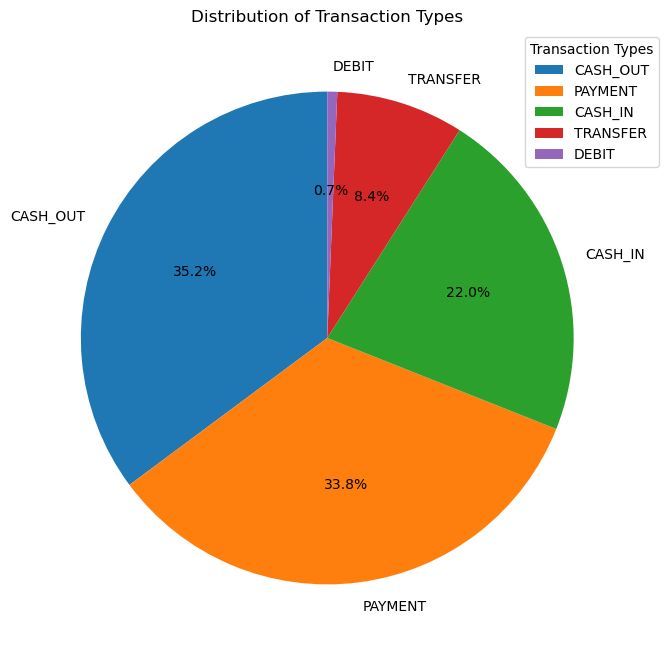

In [92]:
transaction_counts = df['type'].value_counts()
# pie chart
plt.figure(figsize=(8, 8)) 
wedges, texts, autotexts = plt.pie(transaction_counts, autopct='%1.1f%%', startangle=90, labels=transaction_counts.index)
plt.title('Distribution of Transaction Types')
plt.ylabel('')
plt.legend(wedges, transaction_counts.index, title='Transaction Types', loc='upper right', bbox_to_anchor=(1.05,1))
plt.show()

In [93]:
# transaction types
transaction_types = df['type']

# distribution of transaction types
transaction_type_distribution = transaction_types.value_counts()

print(f"Distribution of Transaction Types: {transaction_type_distribution}")


Distribution of Transaction Types: type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [94]:
total_transaction_amount = df['amount'].sum()
total = total_transaction_amount / 1e9

print(f"The total amount of transactions made is: {total_transaction_amount}")
print(f"The total amount of transactions made is: {total:.2f} billion.")


The total amount of transactions made is: 1144392944759.77
The total amount of transactions made is: 1144.39 billion.


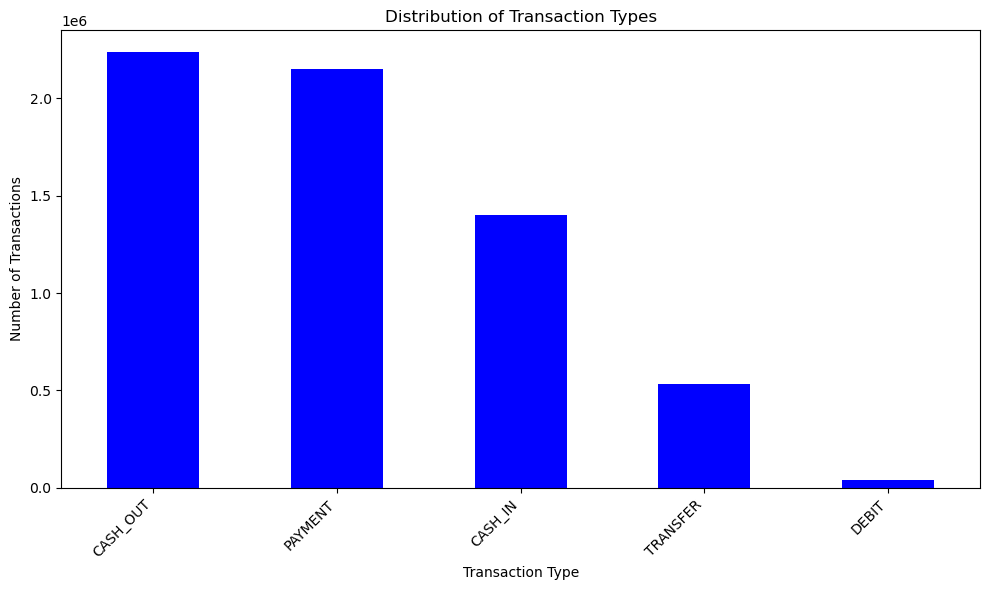

In [95]:
plt.figure(figsize=(10, 6))
transaction_type_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [97]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [98]:
# fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

# the distribution of fraudulent transactions by transaction type
fraudulent_transaction_distribution = fraudulent_transactions['type'].value_counts()

print(f"Distribution of Fraudulent Transactions by Transaction Type: {fraudulent_transaction_distribution}")

Distribution of Fraudulent Transactions by Transaction Type: type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


Fraud occurs in CASH_OUT and TRANSFER

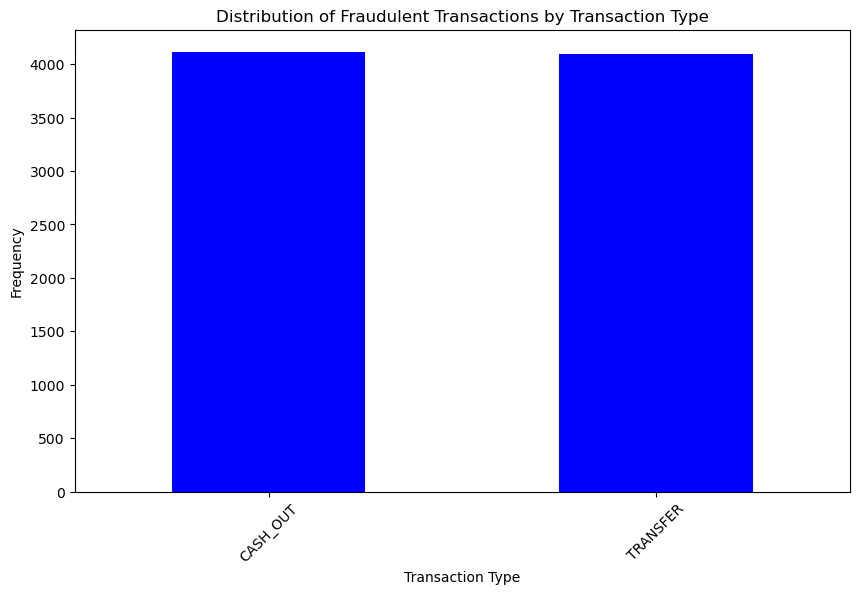

In [99]:
plt.figure(figsize=(10, 6))  # Set the size of the figure
fraudulent_transaction_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Display the plot
plt.show()

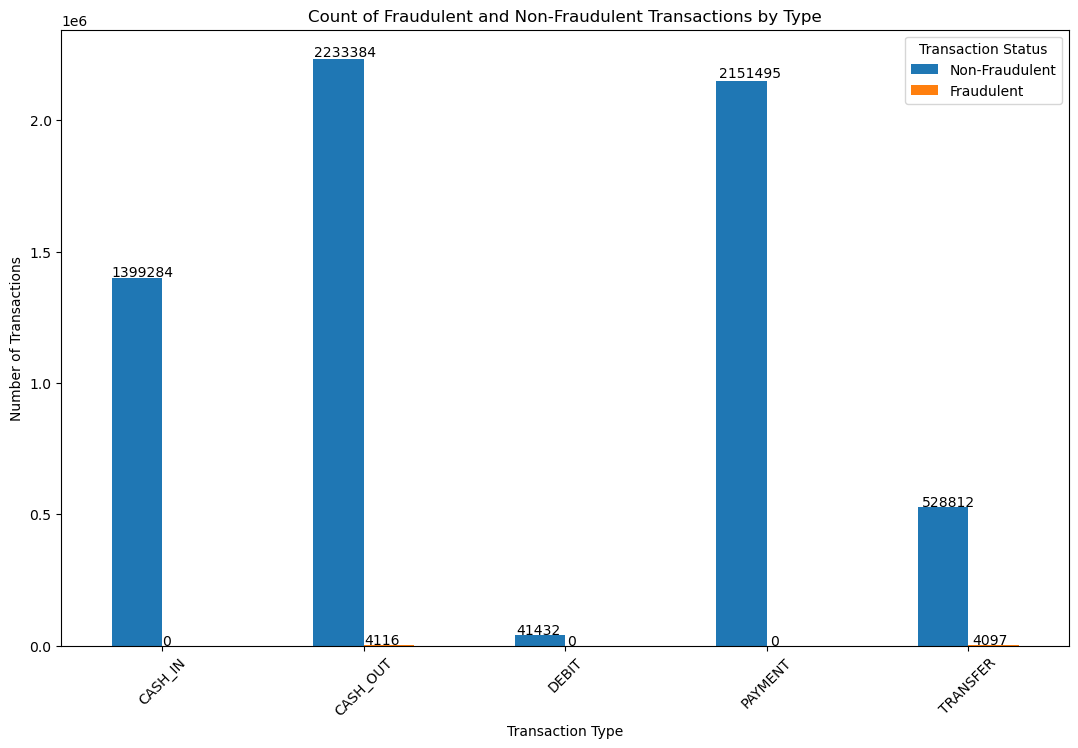

In [100]:
fraud_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)

fraud_type.plot(kind='bar', stacked=False, figsize=(13, 8))

# adding amount on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Type')
plt.legend(['Non-Fraudulent', 'Fraudulent'], title='Transaction Status')
plt.xticks(rotation=45)

plt.show()

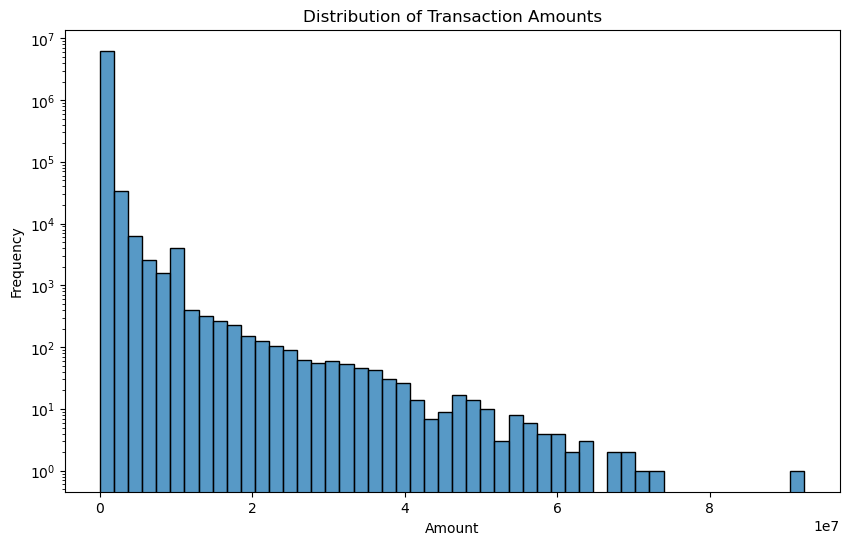

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.yscale("log")
plt.ylabel('Frequency')
plt.show()